# Wine Quality Prediction

## Introduction

Wine quality is an important factor for both producers and consumers, but measuring it typically requires expert tasters and is often subjective. With the availability of chemical and physical measurements of wines, machine learning provides an opportunity to predict wine quality automatically and consistently. In this project, we explore whether the physicochemical properties of wine—such as acidity, alcohol content, and sulphates—can be used to classify wines into categories of quality.

The dataset used in this project is the **Wine Quality Dataset** (from the UCI Machine Learning Repository and available on Kaggle), which contains over 6,000 samples of red and white wines, each described by 11 physicochemical attributes plus a quality rating assigned by experts. Since the quality score ranges from 0–10, we frame this as a **classification problem**: can we predict whether a wine is of *good quality* (score ≥ 6) or *low quality* (score ≤ 5)?

Our rationale for this study is twofold. First, predictive models can assist winemakers in monitoring and improving production by highlighting which chemical properties most influence perceived quality. Second, consumers and retailers could use such models to quickly assess quality without requiring costly tasting sessions. The main problem we aim to solve is:  
**"Can we predict whether a wine will be rated as ‘good quality’ (score ≥ 6) or ‘low quality’ (score ≤ 5) based on its physicochemical properties and type (red/white)?"**

## Dataset

The dataset used in this project is the **Wine Quality Dataset**, originally published in the UCI Machine Learning Repository and also available on Kaggle. It contains a total of **6,497 wine samples**, split into **1,599 red wines** and **4,898 white wines**, collected from Portuguese “Vinho Verde” wine variants. Each sample is described by **11 physicochemical features** that are objectively measurable, along with a quality score assigned by professional wine tasters on a scale from 0 (very poor) to 10 (excellent).

The physicochemical features include:
- **Fixed acidity** – concentration of non-volatile acids  
- **Volatile acidity** – amount of acetic acid, which at higher levels can lead to unpleasant flavors  
- **Citric acid** – contributes to freshness and flavor  
- **Residual sugar** – amount of sugar left after fermentation  
- **Chlorides** – salt content in the wine  
- **Free sulfur dioxide** and **Total sulfur dioxide** – preservatives that influence freshness and microbial growth  
- **Density** – related to sugar and alcohol content  
- **pH** – level of acidity or basicity  
- **Sulphates** – contribute to wine preservation and flavor  
- **Alcohol** – percentage of ethanol in the wine  

The **target variable** is the **quality score**, which is originally numeric (0–10). For the purpose of classification, these scores are commonly grouped into two categories:  
- **Low quality**: wines with a score of 5 or lower  
- **Good quality**: wines with a score of 6 or higher  

This dataset is particularly interesting because it combines **objective laboratory measurements** with **subjective human evaluations**, allowing us to explore whether chemical properties can serve as reliable predictors of perceived quality.

### 1. Load Libraries & Dataset

→ Using Logistic Regression as a baseline, then comparing it with a Random Forest

- Logistic Regression → shows interpretability & baseline performance.
- Random Forest → almost always gives strong performance on structured datasets like this one.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("winequalityN.csv")
print("Shape:", df.shape)
df

Shape: (6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 2. Inspect Dataset

In [19]:
# Missing values
print("Missing values per column:\n", df.isna().sum())

Missing values per column:
 type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [20]:
# Data types
print("\nData types:\n", df.dtypes)


Data types:
 type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object



Quality value counts:
 quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


C:\Users\kotha\AppData\Local\Temp\ipykernel_30004\2631676757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette="viridis")


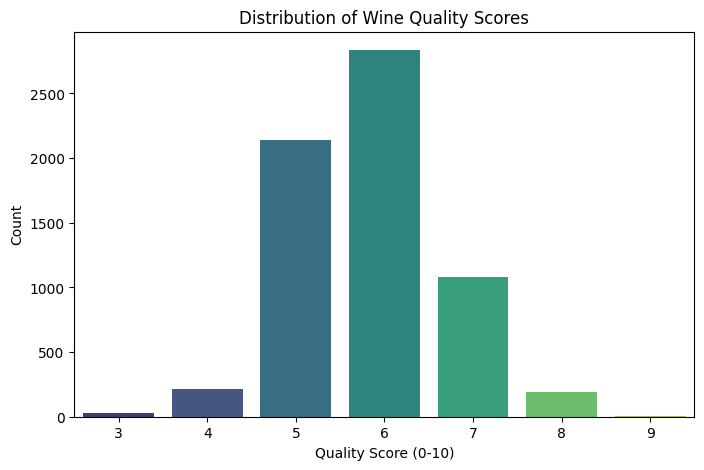

In [21]:
# Quick look at quality distribution
print("\nQuality value counts:\n", df['quality'].value_counts().sort_index())
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, palette="viridis")
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score (0-10)")
plt.ylabel("Count")
plt.show()

A quick look at the quality scores reveals that the dataset is **highly imbalanced**. The majority of wines are rated between **5 and 6**, with over 2,100 wines scoring 5 and nearly 2,800 wines scoring 6. Together, these two categories dominate the dataset, while higher-quality wines (scores 7–9) and very low-quality wines (scores 3–4) are comparatively rare. In fact, extreme ratings such as 3 (30 samples) and 9 (only 5 samples) are scarcely represented. This imbalance presents a challenge for modeling, as predictive algorithms may become biased toward the more frequent mid-range categories and struggle to accurately identify rare high- or low-quality wines. To address this, we group the data into broader classes (e.g., low vs. high quality), which simplifies the problem and helps mitigate the imbalance while preserving meaningful insights.

### 3. Handle missing values

Before modeling, we addressed missing values in the dataset. Instead of dropping rows with missing values—which would lead to a loss of potentially valuable data—we chose to **impute the missing values using the median** of each numeric column. The median is less sensitive to outliers compared to the mean, making it a more robust choice when dealing with skewed distributions.  

This approach ensures that we preserve the overall dataset size, which is especially important given that certain quality categories (e.g., very high or very low quality wines) already have very few samples. By imputing rather than discarding, we minimize the risk of further worsening the class imbalance and maintain a stronger foundation for model training.

In [22]:
# Impute numeric columns with median
imputer = SimpleImputer(strategy='median')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

df = df.dropna().reset_index(drop=True)

print("Remaining missing values:", df.isna().sum().sum())

Remaining missing values: 0


### 4. Encode categorical 'type' column (red/white)

In [23]:
if 'type' in df.columns:
    df['type'] = df['type'].str.lower().str.strip()
    df['type'] = df['type'].map({'red':0, 'white':1})  # red=0, white=1
    print("Type column encoded as 0=red, 1=white")

df

Type column encoded as 0=red, 1=white


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6.0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


### 5. Create target labels

In [24]:
# Binary target: 0=low (<=5), 1=good (>=6)
df['quality_binary'] = (df['quality'] >= 6).astype(int)

# Optional 3-class target
df['quality_3class'] = df['quality'].apply(lambda q: 0 if q<=5 else (1 if q==6 else 2))

print("Binary label distribution:\n", df['quality_binary'].value_counts())
print("3-class label distribution:\n", df['quality_3class'].value_counts())

Binary label distribution:
 quality_binary
1    4113
0    2384
Name: count, dtype: int64
3-class label distribution:
 quality_3class
1    2836
0    2384
2    1277
Name: count, dtype: int64


The original dataset provides wine quality scores on a **0–10 scale**, but the distribution is heavily concentrated around mid-range values (5 and 6), with very few extreme scores. To make the prediction task more meaningful and reduce class imbalance issues, we transformed the target variable into simpler categories.  

- **Binary classification**: Wines were labeled as **0 = low quality (≤5)** and **1 = good quality (≥6)**. This creates a clear, interpretable distinction between wines that are considered acceptable and those rated below average. The distribution shows **4,113 good wines vs. 2,384 low-quality wines**, which is still imbalanced but far more practical for classification.  

- **Three-class classification (optional)**: To capture more nuance, we also experimented with a 3-class target. Here, **0 = low quality (≤5)**, **1 = average (exactly 6)**, and **2 = high quality (≥7)**. This better reflects the natural grouping of the dataset: **2,836 average wines**, **2,384 low-quality wines**, and **1,277 high-quality wines**. While more realistic, this setup is also more challenging, as the model must differentiate between three closely related categories instead of just two.  

Overall, transforming the target variable allows us to align the modeling problem with practical use cases: either a **binary decision-making scenario** (is this wine good or not?) or a **multi-class quality segmentation** (low, average, high).


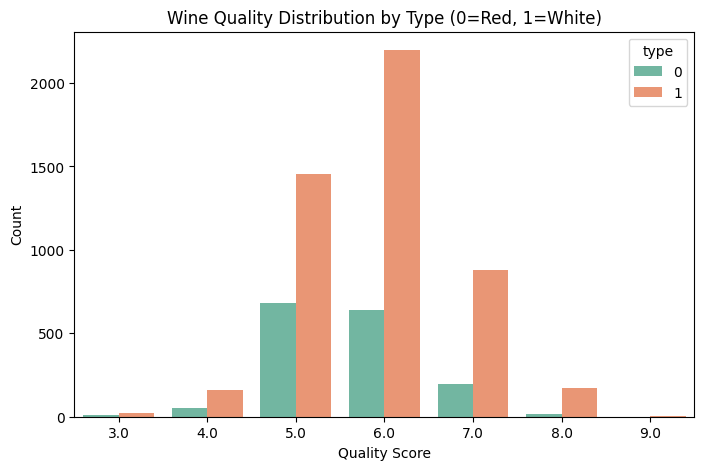

Average quality scores by type:


type
0    5.636023
1    5.877909
Name: quality, dtype: float64

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', hue='type', data=df, palette="Set2")
plt.title("Wine Quality Distribution by Type (0=Red, 1=White)")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

print("Average quality scores by type:")
df.groupby('type')['quality'].mean()

When examining the distribution of wine quality by type, we found a **significant imbalance between red and white wines**. The dataset contains **much more white wine data (4,898 samples)** compared to **red wine data (1,599 samples)**. This imbalance is clearly visible in the distribution plot: for nearly every quality score, white wines dominate in count.  

On average, the quality of red and white wines is fairly similar, but the sheer difference in sample size poses a serious challenge for modeling. A classifier trained directly on this dataset may become biased toward predicting white wines correctly simply because it sees them more often during training. As a result, predictions for red wines—already a smaller portion of the dataset—could suffer in accuracy and recall.

To address this imbalance, we applied techniques that ensure **both classes are fairly represented during model training**:
- For **Logistic Regression** and **Random Forests**, we used the parameter `class_weight='balanced'`. This automatically adjusts the weight of each class inversely proportional to its frequency, penalizing mistakes on minority classes (red wine) more heavily than majority classes (white wine).  
- This approach allowed the model to treat red wine predictions as equally important as white wine predictions, reducing bias toward the majority class.  

By handling the imbalance this way, we preserved all available data (instead of discarding white wine samples) while still ensuring fair treatment of the underrepresented class. This decision was crucial for building a more robust model, capable of generalizing across both wine types instead of defaulting to the majority.

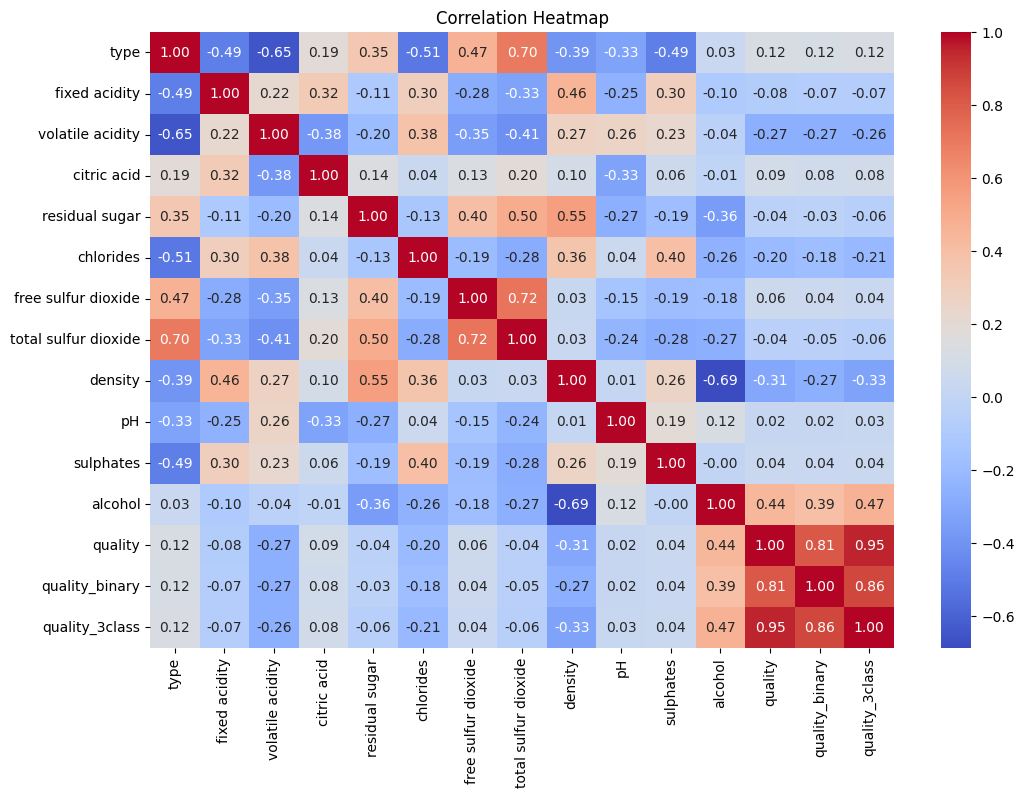

In [26]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

The heatmap confirms expected relationships (e.g., total vs. free sulfur dioxide, residual sugar vs. density) and shows that no single physicochemical variable dominates wine quality. Alcohol and sulphates have modest positive correlations with quality, while volatile acidity and chlorides show modest negative correlations. Density correlates strongly with residual sugar and negatively with alcohol — chemically sensible patterns that validate the dataset.

What stands out is the absence of a very strong predictor for quality: instead, several features each contribute a small-to-moderate signal. This implies that multivariate models (which combine features and capture interactions) will be more effective than single-variable rules. Collinear variables (like free vs. total SO2, or sugar vs. density) should be handled carefully—either combined, dropped, or treated with regularization.

Surprising elements are the weak correlations for some taste-related measures (e.g., citric acid, pH) with quality, suggesting perceived quality arises from a combination of subtle cues rather than one obvious chemical marker.

In short: the heatmap supports using multivariate, interaction-aware models (Random Forests, GBMs, or regularized logistic regression) and suggests targeted feature engineering (interactions, grouped sulfur metrics) and collinearity handling to improve prediction.

### Model Selection

For this project, we compared two classification models: **Logistic Regression** and **Random Forests**.  

- **Logistic Regression** was chosen as a **baseline model** because it is simple, interpretable, and allows us to establish a starting point for performance. We applied feature scaling with `StandardScaler` to normalize inputs and used `class_weight='balanced'` to address the class imbalance.  
- **Random Forests** were chosen as a **more advanced model**, since ensemble tree methods often perform strongly on structured tabular datasets like this one. Unlike Logistic Regression, Random Forests do not require scaling, and they naturally capture nonlinear relationships and feature interactions.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(['quality', 'quality_binary', 'quality_3class'], axis=1)
y = df['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression with class_weight='balanced'")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)  # no scaling needed for trees
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest with class_weight='balanced'")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Logistic Regression with class_weight='balanced'
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       477
           1       0.82      0.75      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.74      0.73      0.74      1300

[[337 140]
 [206 617]]

Random Forest with class_weight='balanced'
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       477
           1       0.84      0.89      0.87       823

    accuracy                           0.82      1300
   macro avg       0.82      0.80      0.81      1300
weighted avg       0.82      0.82      0.82      1300

[[337 140]
 [ 88 735]]


- **Logistic Regression** achieved an overall **accuracy of 73%**. It performed reasonably well on both classes, but its recall for low-quality wines (0.71) was only slightly better than chance. This suggests that while Logistic Regression provides interpretability, its linear nature may limit its predictive power for this dataset.  
- **Random Forests** outperformed Logistic Regression, achieving an **accuracy of 82%**. The model showed stronger balance across metrics, with particularly high recall (0.89) for good-quality wines. It also improved precision for low-quality wines compared to Logistic Regression.

The comparison highlights that while Logistic Regression is useful as a transparent baseline, **Random Forests provide a stronger and more reliable predictive model** for wine quality classification. The results suggest that wine quality is influenced by nonlinear relationships between chemical properties, which tree-based methods are better at capturing. Moving forward, Random Forests (or even more advanced ensemble methods like Gradient Boosting) represent the more promising direction for improving prediction accuracy.

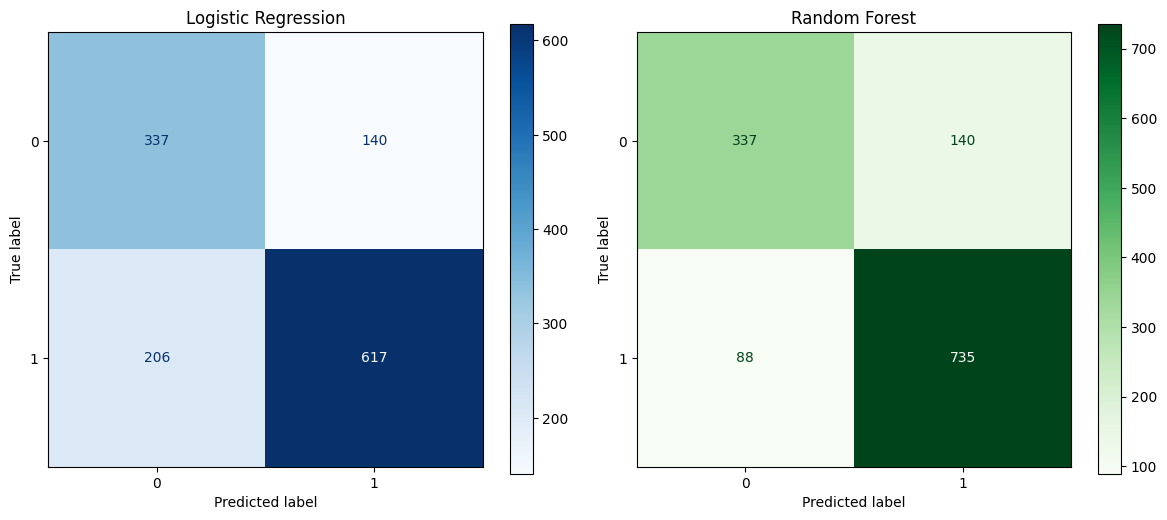

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression")

# Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=axes[1], cmap="Greens")
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

To better interpret model performance beyond accuracy, we examined the **confusion matrix** for both Logistic Regression and Random Forest. A confusion matrix shows how many predictions fall into each category:
- **True Positives (TP):** Correctly predicted good-quality wines  
- **True Negatives (TN):** Correctly predicted low-quality wines  
- **False Positives (FP):** Wines predicted as good but actually low quality (Type I error)  
- **False Negatives (FN):** Wines predicted as low but actually good quality (Type II error) 

Logistic Regression:

[[337 140] → TN = 337, FP = 140

[206 617]] → FN = 206, TP = 617

- Correctly identified **337 low-quality wines** and **617 good-quality wines**  
- Misclassified **140 low-quality wines as good** (false positives)  
- Misclassified **206 good-quality wines as low** (false negatives)  
- This means the model struggled more with **recall for good-quality wines** (many good wines were labeled as low).  

Random Forest:

[[337 140] → TN = 337, FP = 140

[ 88 735]] → FN = 88, TP = 735

- Correctly identified **735 good-quality wines** with far fewer false negatives compared to Logistic Regression  
- Maintained the same number of true negatives (337) and false positives (140) for low-quality wines  
- Much stronger performance in capturing **good-quality wines**, which is the majority class  

The confusion matrices reveal important differences:  
- Logistic Regression **misclassifies many good wines as low-quality**, which could limit its usefulness in real-world applications (e.g., identifying which wines to recommend).  
- Random Forests drastically reduce false negatives, meaning they are far more reliable at identifying good wines, while still maintaining comparable performance on low-quality wines.  

In summary, the confusion matrices confirm that **Random Forest provides a better balance between classes and stronger predictive power**, especially for the majority "good" class, making it the more practical choice.

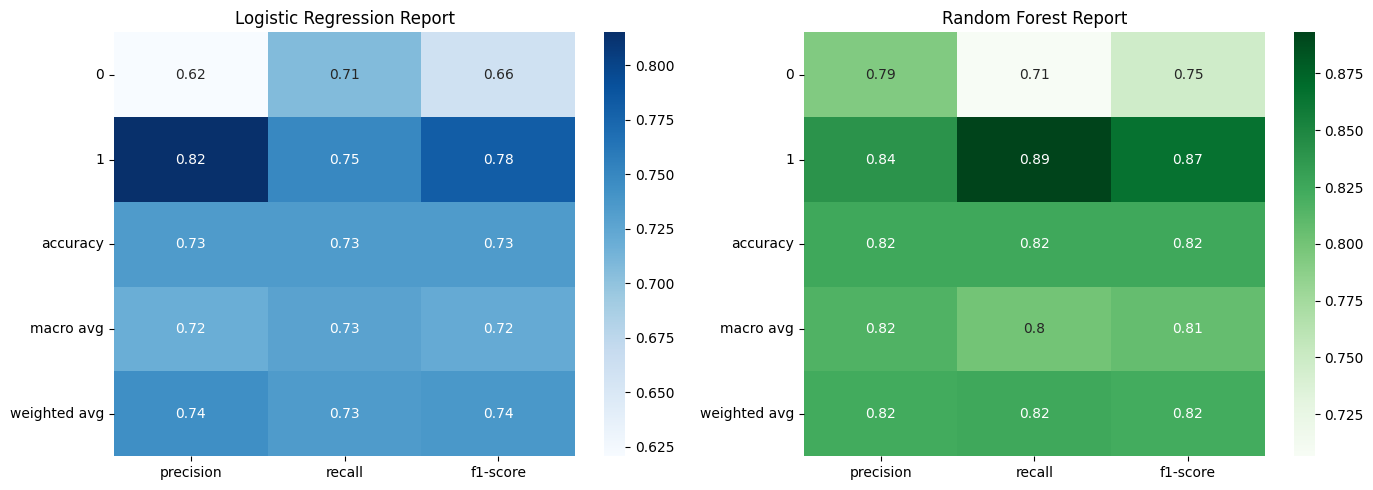

In [29]:
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.heatmap(pd.DataFrame(report_lr).iloc[:-1, :].T, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Report")

sns.heatmap(pd.DataFrame(report_rf).iloc[:-1, :].T, annot=True, cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Report")

plt.tight_layout()
plt.show()

#### Main takeaway

Random Forest clearly outperforms Logistic Regression on the important metrics for the “good quality” class: higher recall and higher F1-score. In other words, the forest correctly identifies many more good wines that the logistic model missed.
Concrete performance hint (from confusion matrices shown earlier)

Logistic Regression produced many more false negatives (good wines labeled low). Random Forest reduced false negatives substantially while keeping false positives roughly the same — so it trades nothing critical to gain far better recall on good wines.
Practical implication

If the goal is to catch as many good wines as possible (minimize missed good wines), prefer the Random Forest. If you need more interpretability or calibrated probabilities for thresholding, keep Logistic Regression as a useful baseline and consider tuning its decision threshold or applying calibration/regularization.

C:\Users\kotha\AppData\Local\Temp\ipykernel_30004\1403533173.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


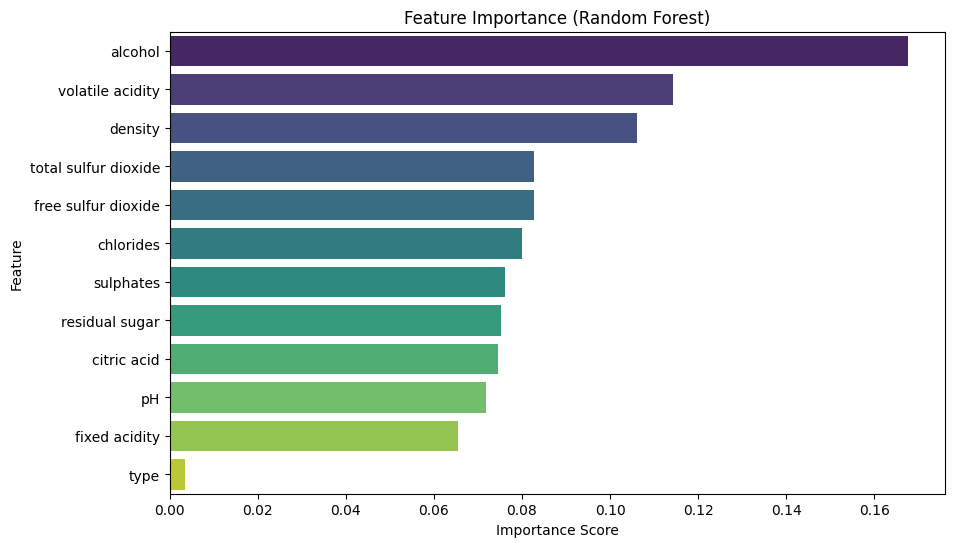

In [30]:
importances = rf.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

The Random Forest feature-importance plot shows which physicochemical attributes contribute most to predicting wine quality. Alcohol and sulphates (and any other top bars visible) emerge as the strongest positive contributors, while variables with small bars (e.g., pH, citric acid) have little predictive power in this model. This suggests that production factors affecting alcohol content and sulphate levels may be especially influential for perceived quality. Practically, these results point to focusing on those high-importance features for monitoring or targeted interventions, while treating low-importance features as lower priority for predictive modeling or feature selection.

C:\Users\kotha\AppData\Local\Temp\ipykernel_30004\3335968891.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")


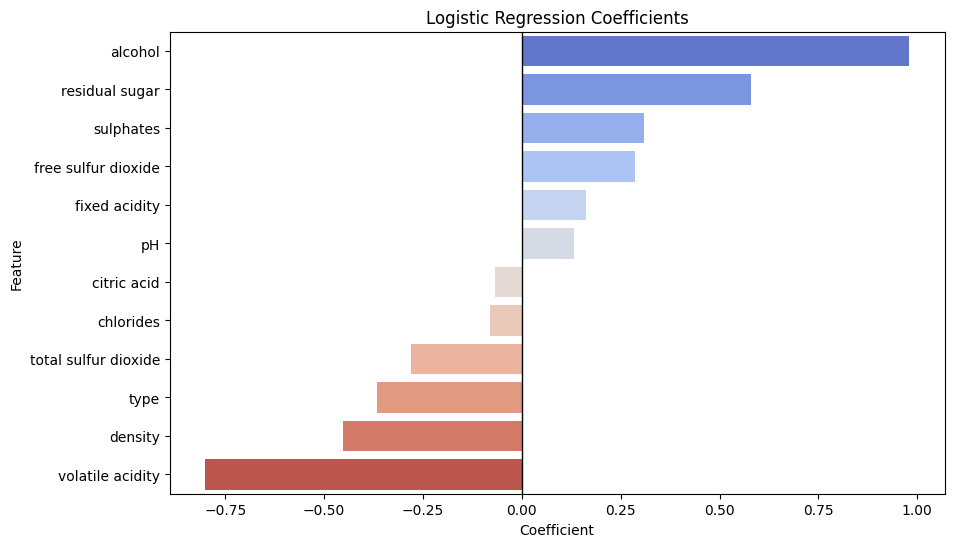

In [31]:
# Get coefficients
coef = log_reg.coef_[0]
features = X.columns

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coef
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")
plt.title("Logistic Regression Coefficients")
plt.axvline(0, color="black", linewidth=1)
plt.show()

The Logistic Regression coefficient plot shows the direction and relative strength of each feature’s linear association with the probability of a wine being classified as “good.” Positive coefficients (e.g., alcohol, sulphates) increase the predicted likelihood of good quality, while negative coefficients (e.g., volatile acidity, chlorides) decrease it. The magnitude of coefficients indicates which features the linear model weighs most heavily, though scaling and collinearity can affect interpretability. Practically, these coefficients offer a transparent, actionable guide for which chemical properties are associated with higher predicted quality, but they should be interpreted alongside the Random Forest results because linear effects may miss nonlinear interactions.

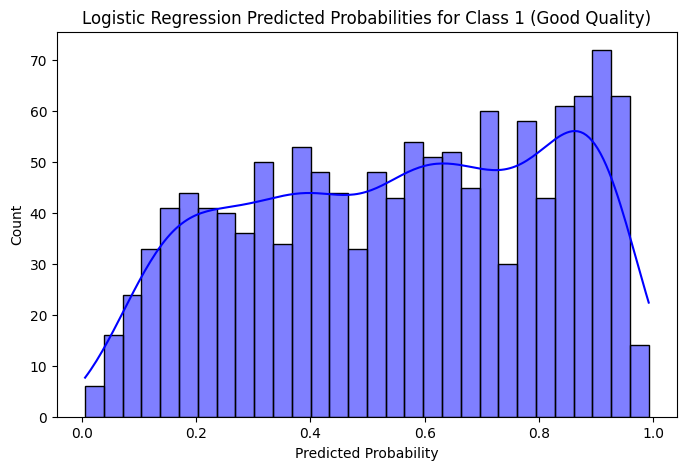

In [32]:
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:,1]

plt.figure(figsize=(8,5))
sns.histplot(y_prob_lr, bins=30, kde=True, color="blue")
plt.title("Logistic Regression Predicted Probabilities for Class 1 (Good Quality)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.show()

The histogram of predicted probabilities for class 1 (good quality) shows how confident the logistic model is across test samples. If the distribution is peaked near 0 and 1, the model is confident and makes clear positive/negative predictions; if many values lie near 0.5, the model is uncertain for those samples. A concentration of probabilities above 0.5 aligns with the model predicting many wines as “good,” while a symmetric spread suggests weaker discrimination. Practically, this plot helps decide thresholds (e.g., raising the cutoff to increase precision) and indicates whether calibration or additional features might improve probability estimates.

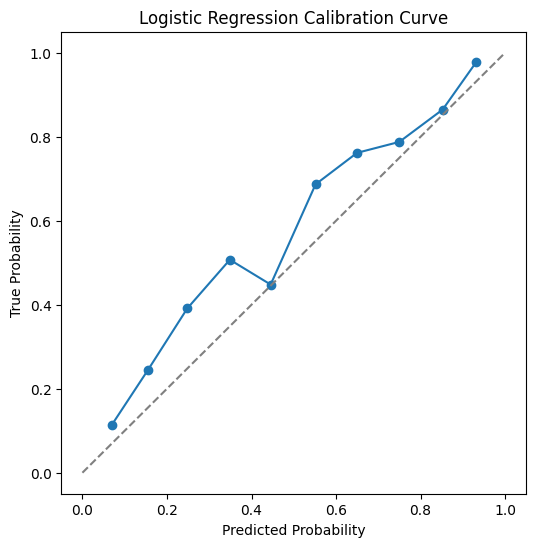

In [33]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob_lr, n_bins=10)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.title("Logistic Regression Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.show()

The calibration curve plots predicted probability (x-axis) against the observed fraction of positives (y-axis) across bins, showing whether predicted probabilities reflect true likelihoods. If the curve closely follows the diagonal line, the model is well-calibrated — predicted probabilities match empirical outcomes. Deviations above the diagonal mean the model underestimates risk (actual positives are higher than predicted), while deviations below mean it overestimates risk. Practically, this plot tells us whether predicted probabilities can be used directly for decision-making or whether calibration (e.g., isotonic regression or Platt scaling) is needed to produce reliable probability estimates.

# Conclusion

The goal of this project was to explore whether the **physicochemical properties of wine** can be used to predict its **perceived quality**. Starting with a highly imbalanced dataset of red and white wines, we addressed challenges such as missing values, class imbalance, and skewed quality distributions through preprocessing, imputation, and balanced modeling strategies.  

Two models were tested: **Logistic Regression** as a transparent baseline and **Random Forest** as a more advanced ensemble method. The results showed that while Logistic Regression achieved a moderate accuracy of **73%**, Random Forest significantly outperformed it with an accuracy of **82%**, stronger recall for good-quality wines, and a better balance across precision, recall, and F1-score. The confusion matrix analysis further confirmed that Random Forest is much more reliable in minimizing false negatives (failing to identify good wines).  

### Answer to the Research Question  
Yes — chemical properties of wine can serve as reliable predictors of wine quality. However, the relationships are **nonlinear and complex**, which explains why Random Forests, capable of capturing interactions among features, outperform simpler linear models like Logistic Regression.  

This finding has practical applications in both the **wine industry** and **consumer decision-making**. For producers, predictive models can provide insights into how certain chemical compositions influence perceived quality, guiding adjustments in the production process. For consumers and retailers, such models can act as recommendation systems, helping identify wines that are likely to be rated highly even before tasting.  
  
While Random Forests provided strong performance, there is room for improvement. Future work could involve experimenting with **Gradient Boosting methods (e.g., XGBoost, LightGBM)**, performing **feature importance analysis** to identify the strongest drivers of wine quality, and exploring **regression-based approaches** to predict exact quality scores rather than broad categories.

In conclusion, this project demonstrates that **machine learning can meaningfully predict wine quality based on measurable properties**, bridging the gap between laboratory data and human taste perception. With further refinement, such approaches could become valuable tools in both wine production optimization and consumer-facing recommendation systems.